In [1]:
%%html
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

In [2]:
import hax
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
from matplotlib.colors import LogNorm
from collections import defaultdict
from array import array
import pylab
from hax import cuts

In [95]:
def ses2_size_cut_ori(s2_area):
    linear_0 = s2_area * 0.00832 + 72.3
    linear_1 = s2_area * 0.03 - 109
    fermi_dirac_coef_0 = 1 / (np.exp((s2_area - 23300) * 5.91e-4) + 1)
    fermi_dirac_coef_1 = 1 / (np.exp((23300 - s2_area) * 5.91e-4) + 1)
    return linear_0*fermi_dirac_coef_0+linear_1*fermi_dirac_coef_1

# Using Machine Learning for single scatter cut

## Motivation:
* See how well machine learning algorithms can be used to establish a multidimensional single scatter cut


In [9]:
rn_run_names = pd.read_pickle('../../../calibration_data/run_names_v6.6.5_rn.pkl')
ambe_run_names = pd.read_pickle('../../../calibration_data/run_names_v6.6.5_ambe.pkl')

In [40]:
# Create dataframes with all rn, ng, ambe
import os

nrn = pd.DataFrame(columns = list(rn_samp))
nambe = pd.DataFrame(columns = list(ambe_samp))

# import data samples and run names
# ngpath = '/home/shawaf/calibration_data/with_new_features/pax_v6.6.5_v1/pax_v6.6.5_ng_event_combine/'
rnpath = '../../../calibration_data/with_new_features/pax_v6.6.5_v1/pax_v6.6.5_rn_event_combine_v1/'
ambepath = '../../../calibration_data/with_new_features/pax_v6.6.5_v1/pax_v6.6.5_ambe_event_combine_v1/'

rn_samp = pd.read_pickle(rnpath + '170313_2018.pkl')
ambe_samp = pd.read_pickle(ambepath + '170316_0834.pkl')

rn_run_names = pd.read_pickle('../../../calibration_data/run_names_v6.6.5_rn.pkl')
ambe_run_names = pd.read_pickle('../../../calibration_data/run_names_v6.6.5_ambe.pkl')

for filename in os.listdir(rnpath):
    df = pd.read_pickle(rnpath + str(filename))
    nrn = nrn.append(df)

for filename in os.listdir(ambepath):
    df = pd.read_pickle(ambepath + str(filename))
    nambe = nambe.append(df)

In [42]:
# assigning classes based on which calibration data

nambe['class'] = 1
nrn['class'] = 2
sim['class'] = 2

In [30]:
# deciding what to put in the NaN's. Although I drop most of these features. There's got to be a better way to do this

nafill = pd.DataFrame({'class' : 0.0,
 'cs1' : 0.0,
 'cs2': 0.0,
 'drift_time': 0.0,
 'event_number': 0.0,
 'run_number': 0.0,
 's1': 0.0,
 's1_area_fraction_top': 0.0,
 's1_pattern_fit': 0.0,
 's1_range_50p_area': 0.0,
 's1_rise_time': 0.0,
 's2': 0.0,
 's2_1_area': 0.0,
 's2_1_area_fraction_top': 0.0,
 's2_1_corrected_area': 0.0,
 's2_1_delay_is1': 0.0,
 's2_1_delay_is2': 0.0,
 's2_1_range_50p_area': 0.0,
 's2_1_goodness_of_fit': 0.0,
 's2_1_interior_split_fraction': 0.0,
 's2_1_x': 1000.0,
 's2_1_y': 1000.0,
 's2_1_z': 1000.0,
 's2_2_area': 0.0,
 's2_2_area_fraction_top': 0.0,
 's2_2_corrected_area': 0.0,
 's2_2_delay_is1': 0.0,
 's2_2_delay_is2': 0.0,
 's2_2_range_50p_area': 0.0,
 's2_2_goodness_of_fit': 0.0,
 's2_2_interior_split_fraction': 0.0,
 's2_2_x': 1000.0,
 's2_2_y': 1000.0,
 's2_2_z': 1000.0,
 's2_3_area': 0.0,
 's2_3_area_fraction_top': 0.0,
 's2_3_corrected_area': 0.0,
 's2_3_delay_is1': 0.0,
 's2_3_delay_is2': 0.0,
 's2_3_range_50p_area': 0.0,
 's2_3_goodness_of_fit': 0.0,
 's2_3_interior_split_fraction': 0.0,
 's2_3_x': 1000.0,
 's2_3_y': 1000.0,
 's2_3_z': 1000.0,
 's2_4_area': 0.0,
 's2_4_area_fraction_top': 0.0,
 's2_4_corrected_area': 0.0,
 's2_4_delay_is1': 0.0,
 's2_4_delay_is2': 0.0,
 's2_4_range_50p_area': 0.0,
 's2_4_goodness_of_fit': 0.0,
 's2_4_interior_split_fraction': 0.0,
 's2_4_x': 1000.0,
 's2_4_y': 1000.0,
 's2_4_z': 1000.0,
 's2_5_area': 0.0,
 's2_5_area_fraction_top': 0.0,
 's2_5_corrected_area': 0.0,
 's2_5_delay_is1': 0.0,
 's2_5_delay_is2': 0.0,
 's2_5_range_50p_area': 0.0,
 's2_5_goodness_of_fit': 0.0,
 's2_5_interior_split_fraction': 0.0,
 's2_5_x': 1000.0,
 's2_5_y': 1000.0,
 's2_5_z': 1000.0,
 's2_area_fraction_top': 0.0,
 's2_pattern_fit': 0.0,
 's2_range_50p_area': 0.0,
 's2_rise_time': 0.0,
 'x': 1000.0,
 'y': 1000.0,
 'z': 1000.0}, index = [df.index])

In [31]:
simfill = pd.DataFrame({'class' : 0.0,
 'cs1' : 0.0,
 'cs2': 0.0,
 'drift_time': 0.0,
 'event_number': 0.0,
 'run_number': 0.0,
 's1': 0.0,
 's1_area_fraction_top': 0.0,
 's1_pattern_fit': 0.0,
 's1_range_50p_area': 0.0,
 's1_rise_time': 0.0,
 's2': 0.0,
 's2_1_area': 0.0,
 's2_1_area_fraction_top': 0.0,
 's2_1_corrected_area': 0.0,
 's2_1_delay_is1': 0.0,
 's2_1_delay_is2': 0.0,
 's2_1_range_50p_area': 0.0,
 's2_1_goodness_of_fit': 0.0,
 's2_1_interior_split_fraction': 0.0,
 's2_1_x': 1000.0,
 's2_1_y': 1000.0,
 's2_1_z': 1000.0,
 's2_2_area': 0.0,
 's2_2_area_fraction_top': 0.0,
 's2_2_corrected_area': 0.0,
 's2_2_delay_is1': 0.0,
 's2_2_delay_is2': 0.0,
 's2_2_range_50p_area': 0.0,
 's2_2_goodness_of_fit': 0.0,
 's2_2_interior_split_fraction': 0.0,
 's2_2_x': 1000.0,
 's2_2_y': 1000.0,
 's2_2_z': 1000.0,
 's2_3_area': 0.0,
 's2_3_area_fraction_top': 0.0,
 's2_3_corrected_area': 0.0,
 's2_3_delay_is1': 0.0,
 's2_3_delay_is2': 0.0,
 's2_3_range_50p_area': 0.0,
 's2_3_goodness_of_fit': 0.0,
 's2_3_interior_split_fraction': 0.0,
 's2_3_x': 1000.0,
 's2_3_y': 1000.0,
 's2_3_z': 1000.0,
 's2_4_area': 0.0,
 's2_4_area_fraction_top': 0.0,
 's2_4_corrected_area': 0.0,
 's2_4_delay_is1': 0.0,
 's2_4_delay_is2': 0.0,
 's2_4_range_50p_area': 0.0,
 's2_4_goodness_of_fit': 0.0,
 's2_4_interior_split_fraction': 0.0,
 's2_4_x': 1000.0,
 's2_4_y': 1000.0,
 's2_4_z': 1000.0,
 's2_5_area': 0.0,
 's2_5_area_fraction_top': 0.0,
 's2_5_corrected_area': 0.0,
 's2_5_delay_is1': 0.0,
 's2_5_delay_is2': 0.0,
 's2_5_range_50p_area': 0.0,
 's2_5_goodness_of_fit': 0.0,
 's2_5_interior_split_fraction': 0.0,
 's2_5_x': 1000.0,
 's2_5_y': 1000.0,
 's2_5_z': 1000.0,
 's2_area_fraction_top': 0.0,
 's2_pattern_fit': 0.0,
 's2_range_50p_area': 0.0,
 's2_rise_time': 0.0,
 'x': 1000.0,
 'y': 1000.0,
 'z': 1000.0}, index = [sim.index])

### Choosing which features the classifier takes and filling NaN's

In [49]:
%%capture

ambe = nambe[nambe.s2>200]
rn = nrn[nrn.s2>200]
df = ambe.append(rn)
df = df.fillna(nafill)

sim = pd.read_pickle("../../../data/nr_ss_sim/simmed_ambe.pkl")
sim['class'] = 2
sim = sim.fillna(simfill)

keep = ['class','s2','s2_range_50p_area', 's2_1_x','s2_1_y','s2_2_x','s2_2_y',
        's2_1_z','s2_2_z',
        's2_1_delay_is2','s2_2_delay_is2',
        's2_1_range_50p_area', 's2_1_area',
       's2_2_range_50p_area', 's2_2_area',
       's2_1_goodness_of_fit', 's2_2_goodness_of_fit']

todrop = ['s2_1_x','s2_1_y','s2_2_x','s2_2_y','s2_3_x','s2_3_y','s2_4_x','s2_4_y']

toadd = ['s2_1_r','s2_2_r']


# applying simple cuts and giving r values to all df's

keep = sorted(list((set(keep) - set(todrop)).union(set(toadd))))

df['s2_1_r'] = np.sqrt(df['s2_1_x']**2 + df['s2_1_y']**2)
df['s2_2_r'] = np.sqrt(df['s2_2_x']**2 + df['s2_2_y']**2)

df = df[keep]


sim['s2_1_r'] = np.sqrt(sim['s2_1_x']**2 + sim['s2_1_y']**2)
sim['s2_2_r'] = np.sqrt(sim['s2_2_x']**2 + sim['s2_2_y']**2)

sim = sim[keep]




# add sum of lesser s2 areas and counts of the s2?
# sums2 = pd.DataFrame(df[['s2_2_area', 's2_3_area', 's2_4_area']].sum(axis=1), columns = ['s2sum'])
# df['sum_lesser_s2_area'] = sums2
# df['counts2'] = counts2

In [50]:
print("keeping",keep)

keeping ['class', 's2', 's2_1_area', 's2_1_delay_is2', 's2_1_goodness_of_fit', 's2_1_r', 's2_1_range_50p_area', 's2_1_z', 's2_2_area', 's2_2_delay_is2', 's2_2_goodness_of_fit', 's2_2_r', 's2_2_range_50p_area', 's2_2_z', 's2_range_50p_area']


## Fitting the Random Forests

### Random Forest

In [84]:
toPredict = sim
toTrain = df

In [70]:
# import sklearn

from sklearn.cross_validation import train_test_split
X, y = toTrain.iloc[:,1:].values, toTrain.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [71]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10000, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [85]:
%%capture
feat_labels = toTrain.columns[1:]

importances = rfc.feature_importances_
indicies = np.argsort(importances)[::-1]
for f in  range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                           feat_labels[indicies[f]],
                           importances[indicies[f]]))

In [86]:
print("RandomForest test score is:", rfc.score(X_test, y_test))

RandomForest test score is: 0.89646064448


## How important each feature is in each classifier

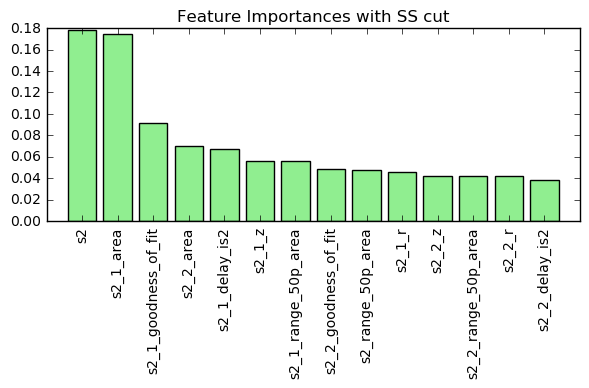

In [87]:
plt.title('Feature Importances with SS cut')
plt.bar(range(X_train.shape[1]),
       importances[indicies],
       color='lightgreen',
       align = 'center')
plt.xticks(range(X_train.shape[1]),
          feat_labels[indicies], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [89]:
predict_test = rfc.predict(X_test)

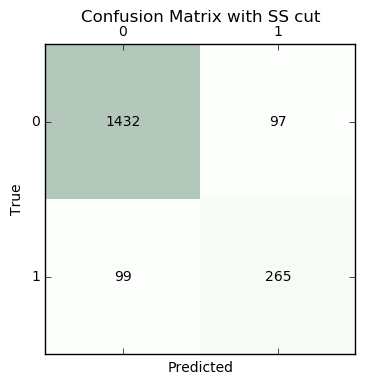

In [90]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=y_test, y_pred=predict_test)

fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(confmat, cmap=plt.cm.Greens, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.title('Confusion Matrix with SS cut')

plt.xlabel('Predicted')
plt.ylabel('True')
# plt.savefig('./figures/confusion_matrix.png', dpi=300)
plt.show()

In [91]:
predict_results = rfc.predict(np.array(toPredict)[:,1:])

In [92]:
predictions = np.unique(predict_results, return_counts=True)
sm = predictions[1][0] + predictions[1][1]
print("RandomForest applied to sim data. \n Proportion classified as AmBe/MS: %s \n Proportion classified as Rn/SS: %s " % (str(predictions[1][0]/sm),str(predictions[1][1]/sm)))

RandomForest applied to sim data. 
 Proportion classified as AmBe/MS: 0.701653210304 
 Proportion classified as Rn/SS: 0.298346789696 


In [93]:
predictions

(array([1, 2]), array([1825,  776]))

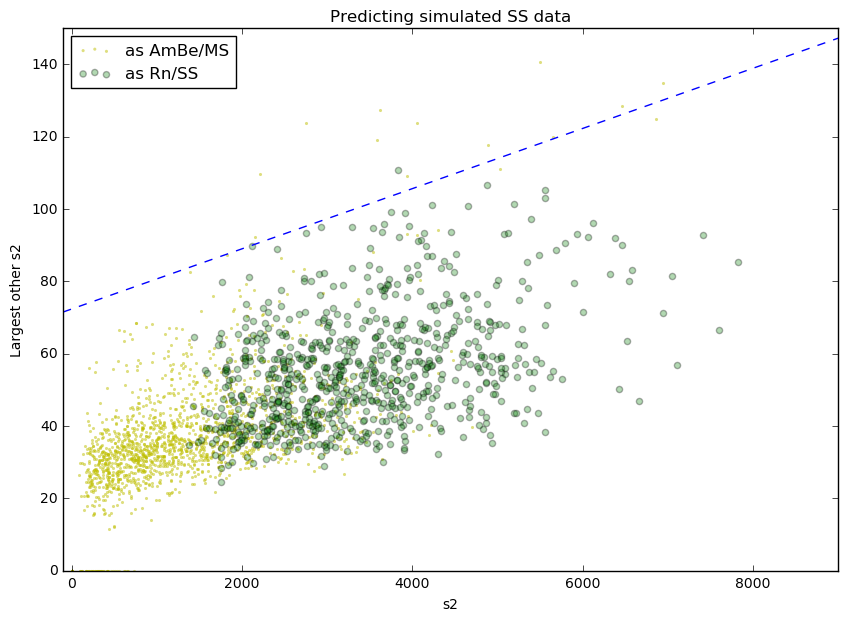

Number of sim data predicted as AmBe/MS within SS cut: 0
Number of sim data predicted as Rn/SS outside SS cut: 1


In [98]:
toPredict['predicted_class'] = predict_results
plt.figure(figsize=(10,7))

plt.scatter(toPredict[toPredict['predicted_class'] == 1]["s2"], toPredict[toPredict['predicted_class'] == 1]["s2_1_area"],
            c='y', marker = '.', lw=0 , alpha = .5, label = "as AmBe/MS")
plt.scatter(toPredict[toPredict['predicted_class'] == 2]["s2"], toPredict[toPredict['predicted_class'] == 2]["s2_1_area"],
            c='g', marker = 'o', alpha = .3,label = "as Rn/SS")


x = np.linspace(-100,10000,10000)
plt.plot(x,ses2_size_cut_ori(x),linestyle='--')

plt.xlim(-100,9000)
plt.ylim(0,150)

plt.title("Predicting simulated SS data")
plt.xlabel("s2")
plt.ylabel("Largest other s2")

plt.legend(loc='upper left')
plt.show()

r = toPredict[(toPredict['predicted_class'] == 0) & (toPredict['s2_1_area'] <= ses2_size_cut_ori(toPredict['s2']))]['class'].count()
q = toPredict[(toPredict['predicted_class'] == 2) & (toPredict['s2_1_area'] >= ses2_size_cut_ori(toPredict['s2']))]['class'].count()

print('Number of sim data predicted as AmBe/MS within SS cut:',r)
print('Number of sim data predicted as Rn/SS outside SS cut:',q)

In [100]:
y_pred_proba = rfc.predict_proba(np.array(toPredict.drop("predicted_class",1))[:,1:])

## Truncated at ends b/c scaling, amount of ambiguity:

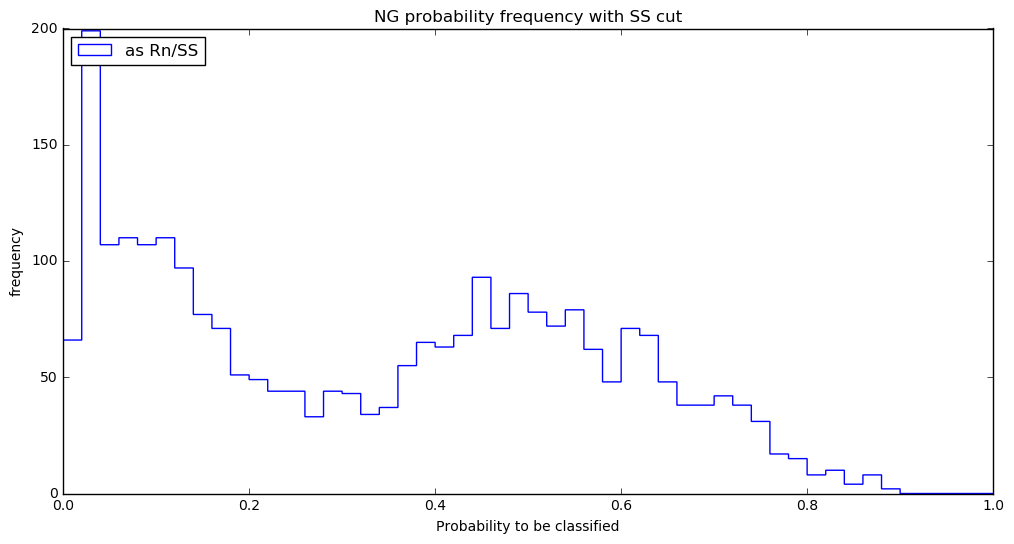

In [102]:
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(12)

plt.hist(y_pred_proba.T[1], bins = 50,histtype = 'step', linestyle = 'solid',range = (0,1),label = 'as Rn/SS')

plt.legend(loc='upper left')
plt.xlabel('Probability to be classified')
plt.ylabel('frequency')
plt.title('NG probability frequency with SS cut')
plt.show()

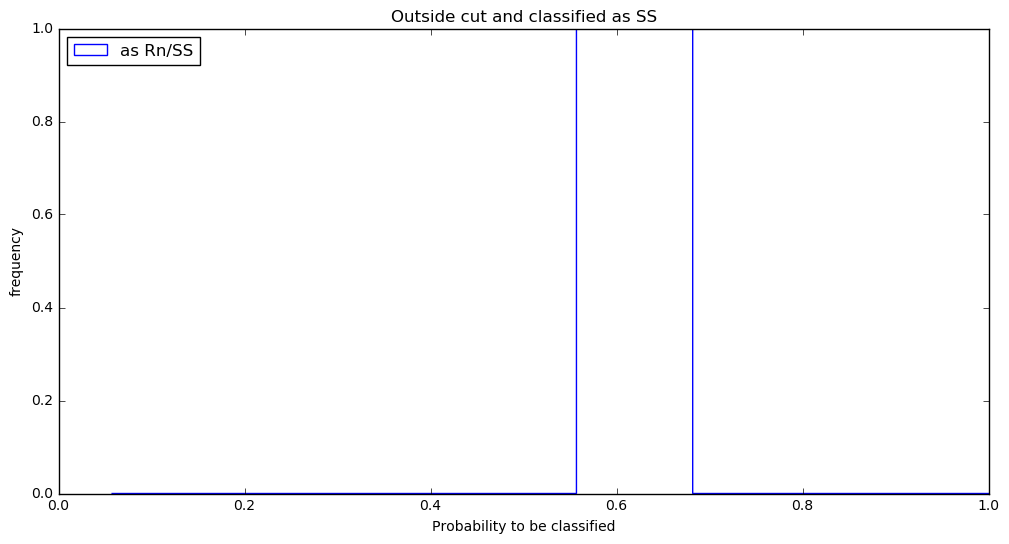

In [104]:
fp = toPredict[(toPredict['predicted_class'] == 2) & (toPredict['s2_1_area'] >= ses2_size_cut_ori(toPredict['s2']))]
del fp['predicted_class']

fpp = rfc.predict_proba(np.array(fp)[:,1:])

fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(12)

plt.hist(fpp.T[1], bins = 8,histtype = 'step', linestyle = 'solid',label = 'as Rn/SS')

plt.xlim(0,1)

plt.legend(loc='upper left')
plt.xlabel('Probability to be classified')
plt.ylabel('frequency')
plt.title('Outside cut and classified as SS')
plt.show()

In [105]:
u = y_pred_proba.T[1]
v = ((u>.2)&(u<.8)).sum()
print("Amount of events with probabilities to be classified between 20% and 80%:", v)

Amount of events with probabilities to be classified between 20% and 80%: 1574
